<a href="https://colab.research.google.com/github/IAMDSVSSANGRAL/UNSUPERVISEDALGO/blob/main/Anomaly_detection_LOF_AND_ISF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
path = '/content/drive/MyDrive/Superstore.xls'

In [17]:
data_raw = pd.read_excel(path)

In [23]:
#creating the copy of data set
df = data_raw.copy()

In [24]:
#examining the top 5 row
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

###UNIVARIATE ANALYSIS FOR SALES

In [25]:
#describing the sales
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

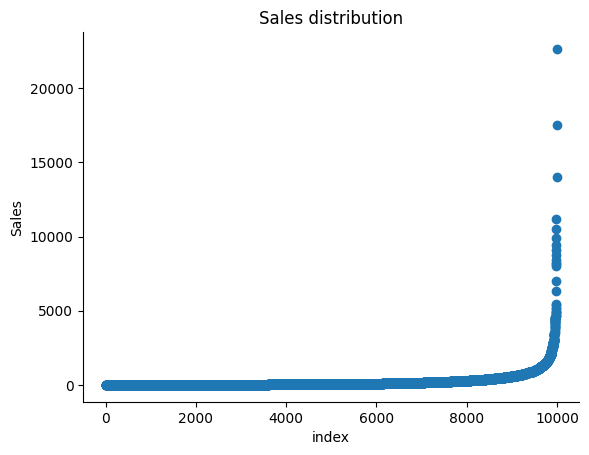

In [27]:
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

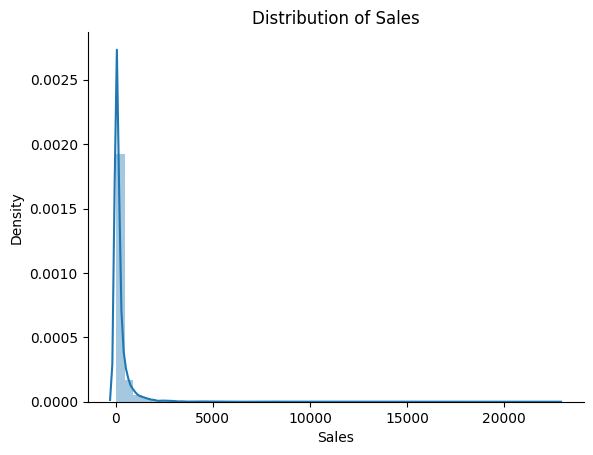

In [28]:
sns.distplot(df['Sales'])
plt.title("Distribution of Sales")
sns.despine()

### univariate anomaly detection using Isolation Forest

In [29]:
from sklearn.ensemble import IsolationForest

In [66]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(df['Sales'].values.reshape(-1,1))
df['iso_pred'] = isolation_forest.predict(df['Sales'].values.reshape(-1, 1))
df['anomaly_score_univariate_sales'] = isolation_forest.decision_function(df['Sales'].values.reshape(-1,1))

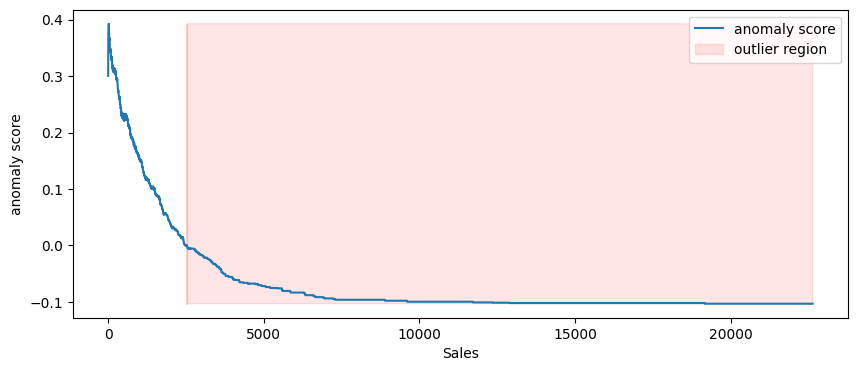

In [42]:
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

#mentioning the graph size
plt.figure(figsize=(10,4))


plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), where=outlier==-1, color='r', alpha=.1, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

### univariate anomaly detection using LOF

In [55]:
from sklearn.neighbors import LocalOutlierFactor

In [56]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1,novelty=True)
clf.fit(df['Sales'].values.reshape(-1, 1))
df['lof'] = clf.predict(df['Sales'].values.reshape(-1, 1))
df['anomaly_score_univariate_sales'] = clf.decision_function(df['Sales'].values.reshape(-1, 1))


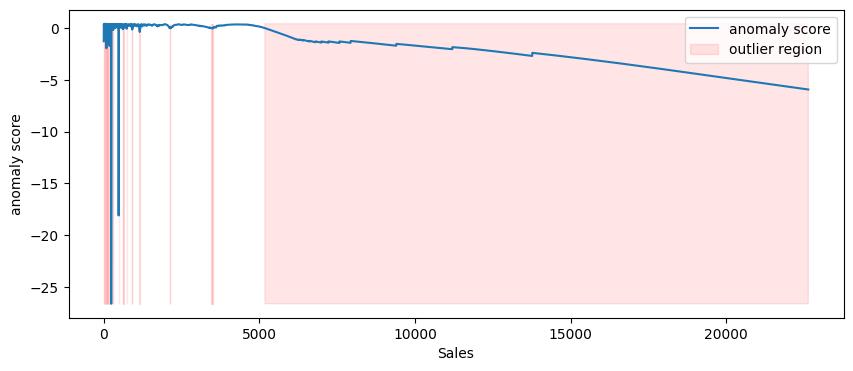

In [59]:
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = clf.decision_function(xx)
outlier = clf.predict(xx)

#mentioning the graph size
plt.figure(figsize=(10,4))


plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), where=outlier==-1, color='r', alpha=.1, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

###UNIVARIATE ANALYSIS FOR PROFIT

In [60]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

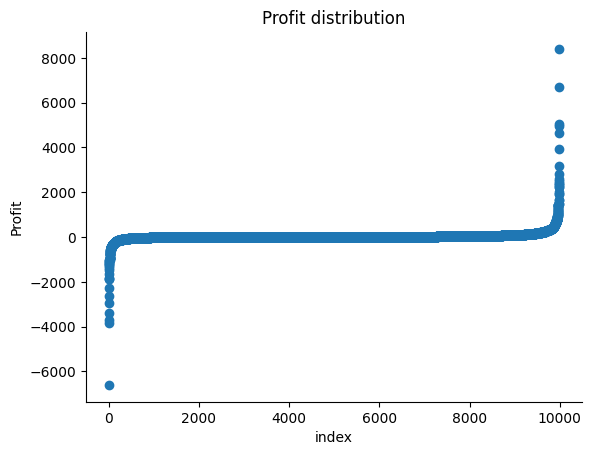

In [61]:
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("Profit distribution")
sns.despine()

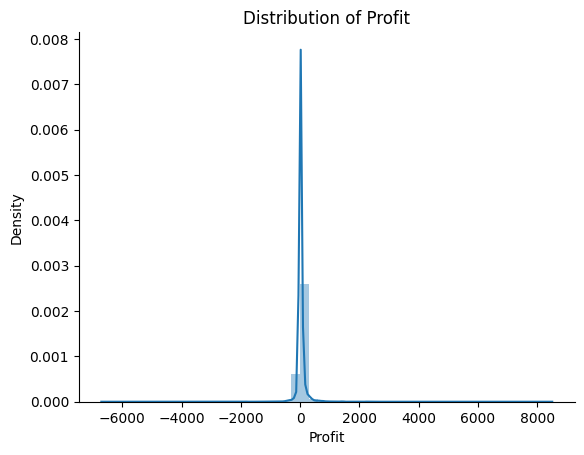

In [62]:
sns.distplot(df['Profit'])
plt.title("Distribution of Profit")
sns.despine()

### univariate anomaly detection using Isolation Forest

In [64]:
from sklearn.ensemble import IsolationForest

In [74]:
df['Profit'].shape

(9994,)

In [77]:
df['Profit'].values.reshape(-1,1).shape

(9994, 1)

In [67]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(df['Profit'].values.reshape(-1,1))
df['iso_pred_profit'] = isolation_forest.predict(df['Profit'].values.reshape(-1, 1))
df['anomaly_score_univariate_profit'] = isolation_forest.decision_function(df['Profit'].values.reshape(-1,1))

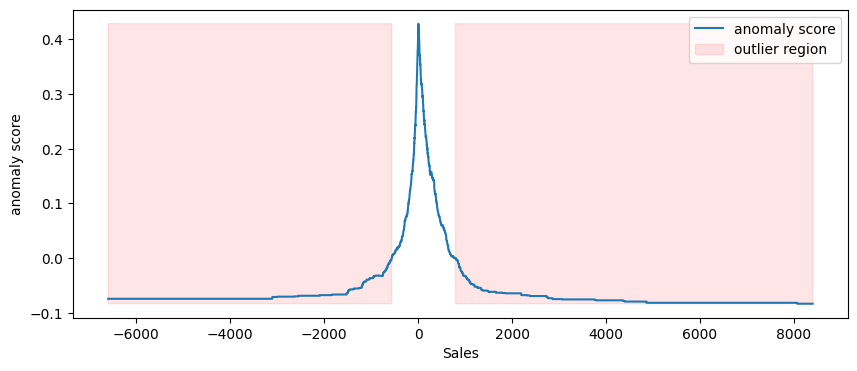

In [69]:
xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

#mentioning the graph size
plt.figure(figsize=(10,4))


plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), where=outlier==-1, color='r', alpha=.1, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

### univariate anomaly detection using LOF

In [70]:
from sklearn.neighbors import LocalOutlierFactor

In [71]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1,novelty=True)
clf.fit(df['Profit'].values.reshape(-1, 1))
df['lof_profit'] = clf.predict(df['Profit'].values.reshape(-1, 1))
df['anomaly_score_univariate_profit'] = clf.decision_function(df['Profit'].values.reshape(-1, 1))


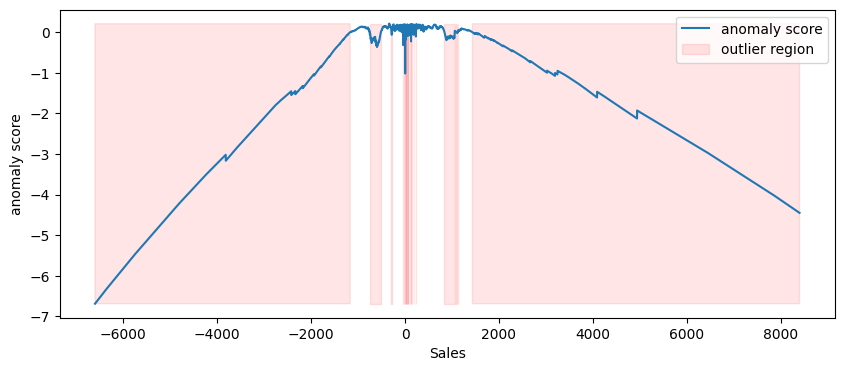

In [73]:
xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
anomaly_score = clf.decision_function(xx)
outlier = clf.predict(xx)

#mentioning the graph size
plt.figure(figsize=(10,4))


plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), where=outlier==-1, color='r', alpha=.1, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

### **Multivariate Anomaly Detection using LOF**





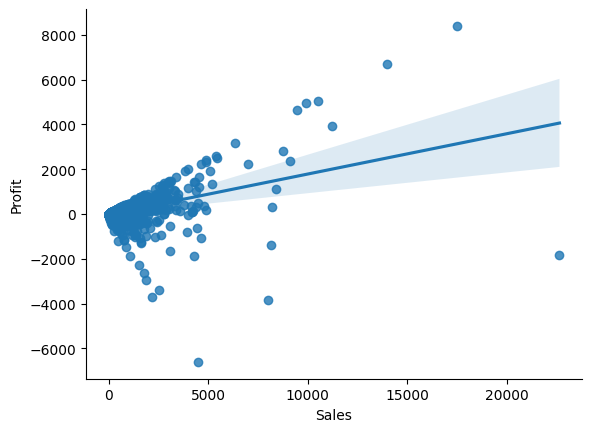

In [78]:
sns.regplot(x="Sales", y="Profit", data=df)
sns.despine();

In [79]:
df[['Sales','Profit']]

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164
...,...,...
9989,25.2480,4.1028
9990,91.9600,15.6332
9991,258.5760,19.3932
9992,29.6000,13.3200


In [81]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(df[['Sales','Profit']])

In [82]:
X

array([[0.01155206, 0.44279413],
       [0.0323127 , 0.45463873],
       [0.0006262 , 0.44045798],
       ...,
       [0.01140258, 0.44129277],
       [0.00128792, 0.44088789],
       [0.0107216 , 0.4448631 ]])

In [83]:
clf = LocalOutlierFactor(n_neighbors=100, contamination=0.01,novelty=True)
clf.fit(X)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(X)

# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(X)

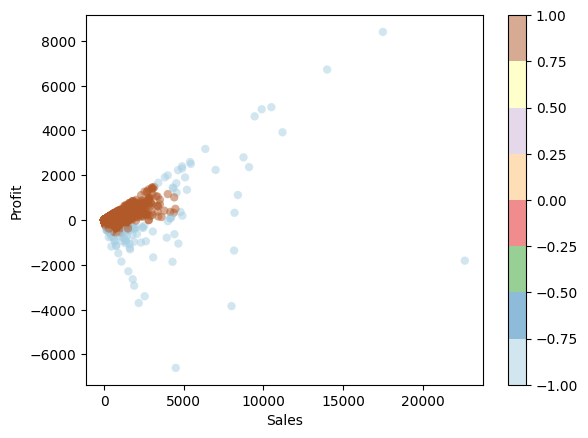

In [105]:
plt.scatter(df['Sales'], df['Profit'],
            c=df.multivariate_outlier, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Paired', 8))
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.colorbar();


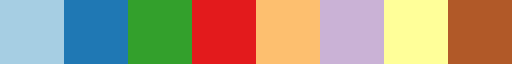

In [96]:
plt.cm.get_cmap('Paired', 8)